

```
# Same as previous model(ODE_1.pynb) but instead of [f(x) = -y] we are using [f(x)= -ky].
```



In [ ]:
# this is one of the test for the ode projrct on ode solving

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def create_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation='tanh', input_shape=(1,)),
        tf.keras.layers.Dense(64, activation='tanh'),
        tf.keras.layers.Dense(64, activation='tanh'),
        tf.keras.layers.Dense(1)
    ])
    return model

def ode(t, y, k):
    return -k * y  # General ODE: dy/dt = -ky


In [ ]:
def loss_function(model, t, k):
    with tf.GradientTape() as tape:
        tape.watch(t)
        y = model(t)
        dy_dt = tape.gradient(y, t)

    ode_physics = dy_dt + k * y  # General ODE constraint
    mse = tf.reduce_mean(tf.square(ode_physics))

    # Add initial condition constraint
    initial_condition = tf.square(model(tf.constant([[0.0]])) - 1.0)

    return mse + initial_condition

In [ ]:
@tf.function
def train_step(model, optimizer, t, k):
    with tf.GradientTape() as tape:
        loss = loss_function(model, t, k)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    return loss

In [ ]:




def solve_ode(k):
    model = create_model()
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

    t_max = min(5.0, 10.0 / k)  # Adjust time range based on k
    t = tf.linspace(0., t_max, 200)
    t = tf.reshape(t, (-1, 1))

    epochs = 10000
    for epoch in range(epochs):
        loss = train_step(model, optimizer, t, k)
        if epoch % 500 == 0:
            print(f"Epoch {epoch}, Loss: {loss.numpy().item():.6f}")

    # Plot results
    y_pred = model(t).numpy()
    y_true = np.exp(-k * t.numpy())  # True solution for dy/dt = -ky

    plt.figure(figsize=(10, 6))
    plt.plot(t.numpy(), y_pred, 'r', label='Predicted')
    plt.plot(t.numpy(), y_true, 'b--', label='True')
    plt.xlabel('t')
    plt.ylabel('y')
    plt.legend()
    plt.title(f'ODE Solution: dy/dt = -{k}y, y(0) = 1')
    plt.show()

    # Calculate and print mean squared error
    mse = np.mean((y_pred.flatten() - y_true.flatten())**2)
    print(f"Mean Squared Error: {mse:.6f}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 0, Loss: 1.065310
Epoch 500, Loss: 0.000931
Epoch 1000, Loss: 0.000385
Epoch 1500, Loss: 0.000127
Epoch 2000, Loss: 0.000434
Epoch 2500, Loss: 0.000054
Epoch 3000, Loss: 0.000033
Epoch 3500, Loss: 0.000022
Epoch 4000, Loss: 0.000452
Epoch 4500, Loss: 0.000136
Epoch 5000, Loss: 0.000799
Epoch 5500, Loss: 0.000019
Epoch 6000, Loss: 0.000018
Epoch 6500, Loss: 0.000017
Epoch 7000, Loss: 0.000020
Epoch 7500, Loss: 0.000018
Epoch 8000, Loss: 0.000017
Epoch 8500, Loss: 0.000021
Epoch 9000, Loss: 0.000018
Epoch 9500, Loss: 0.024822


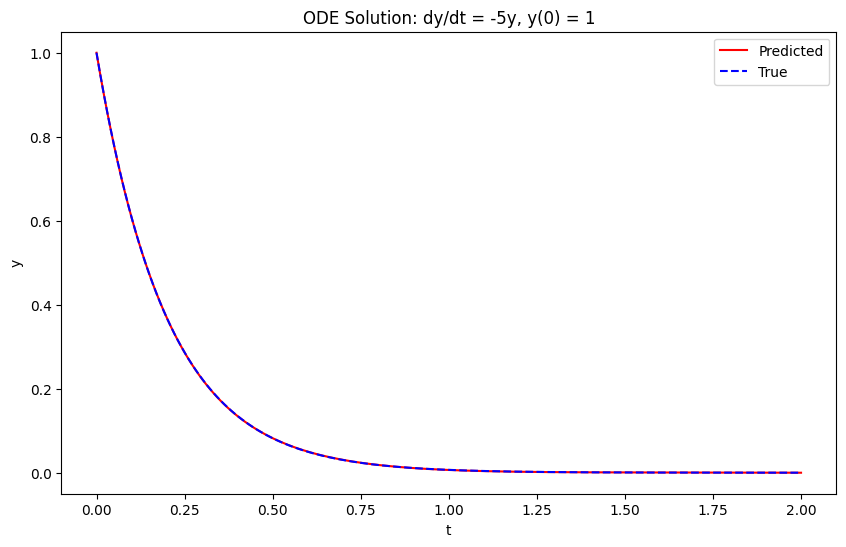

Mean Squared Error: 0.000000


In [ ]:
solve_ode(5)



```
Same overfitting model but will always be able to solve it for the any point. So it works and if it works let it works(Programmer's Thought).
```

